In [1]:
include("jl/init_default.jl");

.
21-פבר 14:10:54:INFO:root:N=74293025 min(m)=46.538624 max(m)=959026.75
21-פבר 14:10:54:INFO:root:rescaling masses
21-פבר 14:10:54:INFO:root:N=74293025 min(m)=50.036606 max(m)=1.0311101e6


In [2]:
kd = get_kd(pos);

In [11]:
include("jl/all.jl")

optimize_zeld_vs_pushed_pos! (generic function with 4 methods)

In [6]:
pop_realization()
rho_to_1st_order_vel_pot!(rho);
v = zeros(Float32, (3,PARTICLE_NUM_SMALL_REALIZATION))
v_original = Any[vx,vy,vz]
for dim in 1:3
    get_1st_order_comoving_vel!(c1, 1.0, dim, pos, rho)
    v[dim,:] = real(c1)
    println(get_slope_std_smoothed(kd, v[dim,:], v_original[dim], pos, 10000.0, 100000))
end

(0.6528422692255723,45.037276652905206)
(0.653127158196859,44.916692344861985)
(0.6531598040324031,44.89547803221163)


In [7]:
pop_realization()
to_delta!(rho);

In [8]:
corr = get_correlation(rho);

In [12]:
pop_realization()
move_periodic_all_dims!(pos, v[1,:], v[2,:], v[3,:], -5.0);
println(mean_std_dx_vs_pushed_pos(pos))
to_cic!(pos, m, rho)
to_delta!(rho)
_corr = get_correlation(rho);

(1635.0775f0,1351.6185f0)


In [13]:
pop_realization()
move_periodic_all_dims!(pos, v[1,:], v[2,:], v[3,:], -6.0);
println(mean_std_dx_vs_pushed_pos(pos))
to_cic!(pos, m, rho)
to_delta!(rho)
_corr2 = get_correlation(rho);

(1962.0929f0,1621.9423f0)


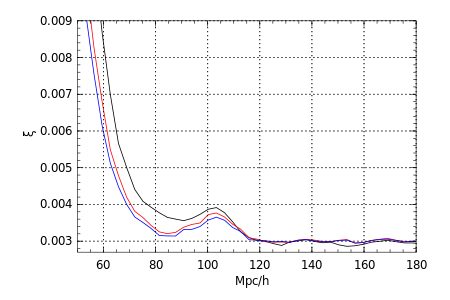

In [14]:
hold(false)
plot(xl/1000, corr)
hold(true)
plot(xl/1000, _corr*1.32, "red")
plot(xl/1000, _corr2*1.35, "blue")
hold(false)
xlim(50,180)
ylim(0.0027,0.009)
grid(true)
xlabel("Mpc/h")
ylabel("\\xi")